# An example using a simple, low-level network representation

In [1]:
using NetPlot

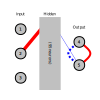

In [2]:
n = [[1, 2, 3], 6:100, [4, 5]]
s = [(2, 7, 3.3), (7, 5, -0.3), (4, 5, 2), (5, 4, -2)]

netplot(n, s, layer_name=["Input", "Hidden", "Output"])

# An example using the AdaptiveNet package

In [3]:
using AdaptiveNet, Distributions, Measures

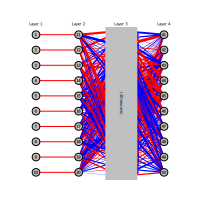

In [4]:
activation_dist = LogNormal{Float32}(0.0f0, 1.0f0)#Weibull{Float32}(2.0f0, 1.0f0)
num_inputs = 10
num_outputs = 10
num_neurons_1, num_neurons_2 = (num_inputs, 20)
input_buffer = zeros(Float32, num_inputs)
output_buffer = zeros(Float32, num_outputs)
nparams_input = (200.0f0, [[0.1f0, 0.1f0]], 0.0f0, [[0.5f0, 0.2f0]])
nparams_hidden = (200.0f0, [[0.1f0, 0.1f0]], 0.0f0, [[0.0f0, 1.0f0]])

sparams_ff = (0.005f0, 1.0f0, :noclip)
sparams_lat = (0.01f0, -3.0f0, :clipnegative)

# Create layers
l_0 = Layer(BufferNode, [input_buffer], 1:num_inputs)
l_1 = Layer(AdaptiveNeuron, nparams_input...,  Beta{Float32}(0.5f0, 0.5f0), Uniform{Float32}(-0.5f0, 0.5f0),       num_neurons=num_neurons_1)
l_2 = Layer(AdaptiveNeuron, nparams_hidden..., Normal{Float32}(0.0f0, 1.0f0), activation_dist, num_neurons=num_neurons_2)
l_3 = Layer(BufferNode, [output_buffer], 1:num_outputs)

# Create synaptic feed-forward connections
w_1_0 = eye(Float32, num_inputs)
s_1_0 = Synapses(l_0, l_1, FixedSynapse, w_1_0.!=0, w_1_0)
s_2_1 = Synapses(l_1, l_2, HebbianSynapse, 1, randn(Float32, num_neurons_2, num_neurons_1), sparams_ff...)
s_3_2 = Synapses(l_2, l_3, HebbianSynapse, 1, randn(Float32, num_outputs, num_neurons_2), sparams_ff...)

# Create lateral connections
# s_2_2 = Synapses(l_2, l_2, FixedSynapse, tril(ones(Bool, num_neurons_2, num_neurons_2), -1), -3.0f0)
s_2_2 = Synapses(l_2, l_2, HebbianSynapse, tril(ones(Bool, num_neurons_2, num_neurons_2), -1), -3.0f0, sparams_lat...)

# Generate network
net = Network([l_0, l_1, l_2, l_3], [s_1_0, s_2_1, s_3_2, s_2_2])

netplot(net, svg_args=(20cm, 20cm))